In [80]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

import pickle


# Problem 1

### Read Data

In [81]:
df = pd.read_csv('cicids_static_data.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,51673,2,2,90,166,45,45,45.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,7496,43,1,1,0,6,0,0,0.0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,ATTACK
3,46564,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,80,69,2,0,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             25191 non-null  int64  
 1    Flow Duration                25191 non-null  int64  
 2    Total Fwd Packets            25191 non-null  int64  
 3    Total Backward Packets       25191 non-null  int64  
 4   Total Length of Fwd Packets   25191 non-null  int64  
 5    Total Length of Bwd Packets  25191 non-null  int64  
 6    Fwd Packet Length Max        25191 non-null  int64  
 7    Fwd Packet Length Min        25191 non-null  int64  
 8    Fwd Packet Length Mean       25191 non-null  float64
 9    Fwd Packet Length Std        25191 non-null  float64
 10  Bwd Packet Length Max         25191 non-null  int64  
 11   Bwd Packet Length Min        25191 non-null  int64  
 12   Bwd Packet Length Mean       25191 non-null  float64
 13   

In [83]:
for col in df:
    #print(col,":                " ,df[col].isnull().sum())
    if df[col].isnull().sum() != 0 :
        print(col, df[col].isnull().sum() )

Flow Bytes/s 6


### Data Preprocessing
#### Remove outliers or null values

In [84]:
df = df.replace([np.inf, -np.inf, np.nan] , 0)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,51673,2,2,90,166,45,45,45.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,7496,43,1,1,0,6,0,0,0.0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,ATTACK
3,46564,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,80,69,2,0,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#### Split features and label

In [85]:
X = df.drop(['Label'], axis=1)
y = df['Label']
 
print(y.shape, X.shape)

(25191,) (25191, 78)


#### Explore data imbalance

/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

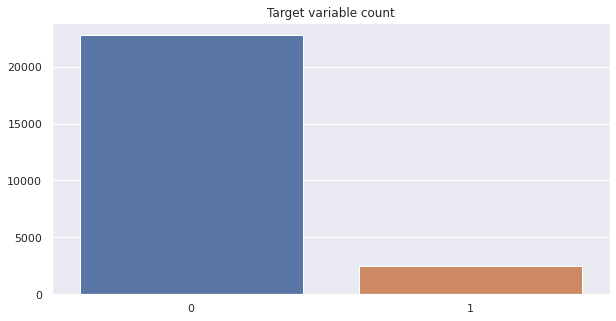

In [86]:
z=y.value_counts().values
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot([0,1],z)
plt.title('Target variable count')

#### Apply data oversampling using SMOTE

In [87]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_sm.shape, y_sm.shape

((45488, 78), (45488,))

/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

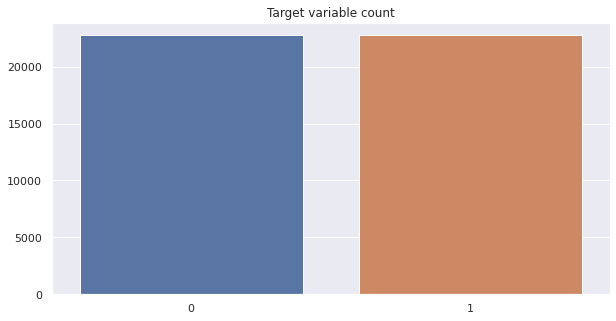

In [88]:
z=y_sm.value_counts().values
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot([0,1],z)
plt.title('Target variable count')

## Split data into train and test

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, train_size = 0.7)

## Classifier 1 (RandomForest)

In [90]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9986077526196233)

In [91]:
# f1_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='macro')

In [92]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      ATTACK       1.00      1.00      1.00      6808
      BENIGN       1.00      1.00      1.00      6839

    accuracy                           1.00     13647
   macro avg       1.00      1.00      1.00     13647
weighted avg       1.00      1.00      1.00     13647



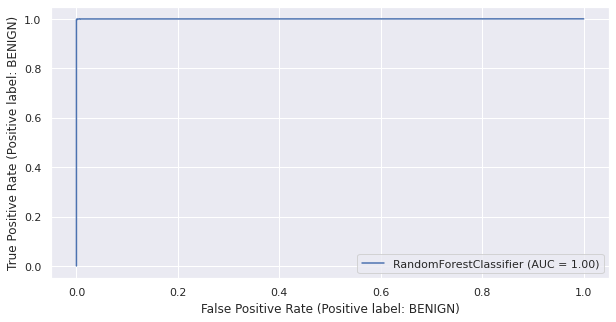

In [93]:
from sklearn import metrics
import matplotlib.pyplot as plt
metrics.plot_roc_curve(clf, X_test, y_test)

## Classifier 2 (XGBoost)

In [94]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic',learning_rate = 0.001,colsample_bytree = 0.8,
                              max_depth = 10, alpha = 10, n_estimators = 50,scale_pos_weight=20).fit(X_train, y_train)

/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9986077526196233)

In [96]:
from sklearn.metrics import classification_report
y_pred = xg_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      ATTACK       1.00      0.97      0.98      6808
      BENIGN       0.97      1.00      0.98      6839

    accuracy                           0.98     13647
   macro avg       0.98      0.98      0.98     13647
weighted avg       0.98      0.98      0.98     13647



### We move on with the RandomForestClassifier because it provides better results

#### RandomForest k fold cross validation


In [97]:
cross_val_score(clf, X_sm, y_sm, cv=10)

array([0.99736206, 0.99956034, 0.99890086, 0.99890086, 0.99868103,
       0.99912069, 0.99956034, 0.99912069, 0.99890062, 1.        ])

### Retrain the model on the entire dataset, and save it to be able to use it in the adaptive part

In [48]:
# retrain on the entire upsampled dataset
clf.fit(X_sm,y_sm)
# save the model to disk
filename = 'BC_model.sav'
pickle.dump(clf, open(filename, 'wb'))

____________

_______

# Problem 2

In [130]:
df_multi = pd.read_csv('iot_static_data.csv')
# df_multi.head()

In [131]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Columns: 117 entries, MI_dir_L5_weight to Class
dtypes: float64(115), object(2)
memory usage: 22.9+ MB


### Data Preprocessing
##### Check for null values, feature selection

In [132]:
for col in df_multi:
    #print(col,":                " ,df[col].isnull().sum())
    if df_multi[col].isnull().sum() != 0 :
        print(col, df_multi[col].isnull().sum() )

In [133]:
# By checking the feature description we find out that the only categorical column is of no practical importance
# Remove the categorical column to make the process faster and easier
df_multi.drop(['Source'], axis=1, inplace=True)

#### Split features and label

In [134]:
X_multi= df_multi.drop(['Class'], axis=1)
y_multi = df_multi['Class']
y_multi.shape, X_multi.shape

((25609,), (25609, 115))

#### Scaling

In [135]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_multi_scaled = scaler.fit_transform(X_multi)
X_multi_scaled = pd.DataFrame(X_multi_scaled)

In [136]:
X_multi_scaled.replace([np.inf, -np.inf], np.nan).dropna(axis=0, inplace= True)

#### Check data imbalance

[22287  1774   446   377   213   200   101    96    86    18    11]


/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

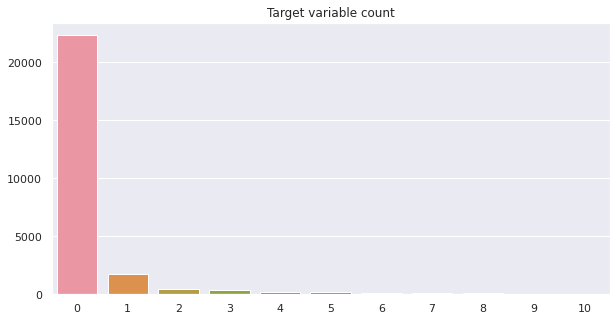

In [137]:
z=y_multi.value_counts().values
print(z)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot([0,1,2,3,4,5,6,7,8,9,10],z)
plt.title('Target variable count')

#### OverSample

In [138]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_multi, y_multi)
X_sm.shape, y_sm.shape

((245157, 115), (245157,))

[22287 22287 22287 22287 22287 22287 22287 22287 22287 22287 22287]


/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

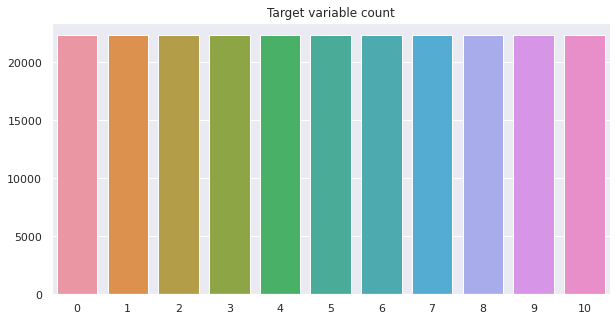

In [139]:
z=y_sm.value_counts().values
print(z)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot([0,1,2,3,4,5,6,7,8,9,10],z)
plt.title('Target variable count')

### Split into train and test sets

In [140]:
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_sm,y_sm, train_size = 0.7)

### Classifier 1 (RandomForest)

In [141]:
clf_multi = RandomForestClassifier()
clf_multi.fit(X_multi_train, y_multi_train)
clf_multi.score(X_multi_train, y_multi_train), clf_multi.score(X_multi_test, y_multi_test)

(0.9997086399897441, 0.9995513134279654)

In [142]:
y_multi_pred = clf_multi.predict(X_multi_test)
f1_score(y_multi_test, y_multi_pred, average='macro'), recall_score(y_multi_test, y_multi_pred, average='macro'), precision_score(y_multi_test, y_multi_pred, average='macro')

(0.9995523852977221, 0.9995518109216551, 0.9995550941717336)

In [143]:
print(classification_report(y_multi_test, y_multi_pred))

                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      6778
  gafgyt_combo_attack       1.00      1.00      1.00      6616
   gafgyt_junk_attack       1.00      1.00      1.00      6759
   gafgyt_scan_attack       1.00      1.00      1.00      6708
    gafgyt_tcp_attack       1.00      1.00      1.00      6691
    gafgyt_udp_attack       1.00      1.00      1.00      6710
     mirai_ack_attack       1.00      1.00      1.00      6684
    mirai_scan_attack       1.00      1.00      1.00      6676
     mirai_syn_attack       1.00      1.00      1.00      6628
     mirai_udp_attack       1.00      1.00      1.00      6615
mirai_udpplain_attack       1.00      1.00      1.00      6683

             accuracy                           1.00     73548
            macro avg       1.00      1.00      1.00     73548
         weighted avg       1.00      1.00      1.00     73548



### Classifier 2 (XGBoost)

In [144]:
xg_class = xgb.XGBClassifier(objective ='binary:logistic',learning_rate = 0.001,colsample_bytree = 0.8,
                              max_depth = 10, alpha = 10, n_estimators = 50,scale_pos_weight=20).fit(X_multi_train, y_multi_train)
xg_class.score(X_multi_train, y_multi_train), xg_class.score(X_multi_test, y_multi_test)

/home/yomna/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:06:46] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:06:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9990443391663607, 0.9988170990373634)

In [145]:
y_multi_pred = xg_class.predict(X_multi_test)
f1_score(y_multi_test, y_multi_pred, average='macro'), recall_score(y_multi_test, y_multi_pred, average='macro'), precision_score(y_multi_test, y_multi_pred, average='macro')

(0.9988162542258465, 0.9988186266249915, 0.9988196705081887)

In [146]:
print(classification_report(y_multi_test, y_multi_pred))

                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      6778
  gafgyt_combo_attack       1.00      1.00      1.00      6616
   gafgyt_junk_attack       1.00      1.00      1.00      6759
   gafgyt_scan_attack       1.00      1.00      1.00      6708
    gafgyt_tcp_attack       1.00      1.00      1.00      6691
    gafgyt_udp_attack       1.00      1.00      1.00      6710
     mirai_ack_attack       1.00      0.99      1.00      6684
    mirai_scan_attack       1.00      1.00      1.00      6676
     mirai_syn_attack       1.00      1.00      1.00      6628
     mirai_udp_attack       0.99      1.00      1.00      6615
mirai_udpplain_attack       1.00      1.00      1.00      6683

             accuracy                           1.00     73548
            macro avg       1.00      1.00      1.00     73548
         weighted avg       1.00      1.00      1.00     73548



### We proceed with the Random Forest because it provides better results

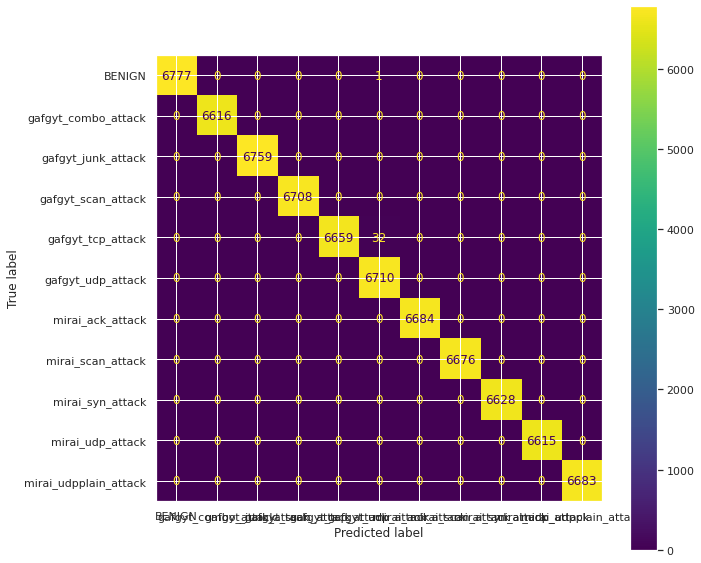

In [148]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_multi, X_multi_test, y_multi_test, ax=ax)  

In [149]:
cross_val_score(clf_multi, X_sm, y_sm, cv=10)

array([0.99934736, 0.99963289, 0.99967368, 0.99975526, 0.99975526,
       0.9995921 , 0.99963289, 0.9995513 , 0.99967367, 0.99987763])


#### Retrain the model on the entire dataset, and save it to be able to use it in the adaptive part

In [150]:
clf_multi.fit(X_sm, y_sm)
# save the model to disk
filename = 'MC_model.sav'
pickle.dump(clf_multi, open(filename, 'wb'))